# Code-tober 2019: Introduction to Data Analysis With Python
## Climate Change: Earth Surface Temperature Data
## Tuesday, October 15
### Tawfiq Jawhar 


In [0]:
##importing some libraries that we can use
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset
The dataset we are using is from Kaggle which can be found [here](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data).

We are only using one file from the dataset which is the global temperature per country. 

We will import the file and start exploring.

## Importing the Data
We are going to use the UI of colab to upload our csv file. On the left we can use the panel to upload the file. The file will be uploaded to the local VM we are using and after the session is terminated the file will be lost. 

So, we need to upload it every time we want to run this. But this is an easy way to upload files to be used with colab. You can mount your google drive and access the files in google drive, but you will have to give access to all your google drive files. 

After uploading the file, you can right click on it and copy the path of that file. We will use the path to open the file using Pandas library.


In [0]:
filePath = '/content/GlobalLandTemperaturesByCountry.csv'
##  reading the global temperature by country file and specifying 
##  the dt column to be date 
##  which will change the type of that column from normal strings
##  to datetime type in pandas
##  it will allow us to filter based on time much easier than dealing with strings

GTbyCountry = pd.read_csv(filePath, parse_dates=['dt'])

## Looking at The File
We now have a Pandas dataframe called `GTbyCountry` which has the data of our csv file.

We will use method `head()` to look at the top rows in the file and understand how many coloumns the file has and what kind of data we have.

In [3]:
GTbyCountry.head() #default will show us 5 top rows. 
##  We can also call .head(n) where n is the nunber of top rows we want to see

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


We have 4 columns inside the file. dt, AverageTemperature, AverageTemperatureUncertainty, and Country.
We can immediatly notice that we have NaN values. So the data we have is missing values. 

We want the type of dt to be pandas datetime type and not a string. That way we can use the datetime functionalities to filter per year, month and day without the need to parse the string ourselves. 

We will first check the type of the column dt. Sometimes the date format is autodetected when we read the file.



In [4]:
GTbyCountry.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Country                                  object
dtype: object

Great! `dt` is already of type `datetime` which is what we want. 
If `dt` is not of type `datetime` then we can convert it like this:

```GTbyCountry.dt = pd.to_datetime(GTbyCountry.dt)```

We use the function `to_datetime` which is part of pandas library and we pass to it the column that we want to convert which is `dt`. And we assign the return to the column we want in our dataframe. Which is `dt`. 


**Note**: we can access a column in a dataframe by doing `GTbyCountry.dt` or by doing `GTbyCountry['dt']`.

I like to use the first method because the name will be suggested in the autocomplete instead of typing the full name of the column in the array like way.


In [0]:
#GTbyCountry.dt = pd.to_datetime(GTbyCountry.dt)

## How many NaNs do we have?

We will use a method `isna()` which will return a dataframe of the same size of `GTbyCountry` with only True or False values. True for when a value is NaN and False when the value is not NaN.

In [6]:
GTbyCountry.isna().head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,False,False,False,False
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False


To know how many NaN values we have, we will sum the values of the columns. Because it is Boolean data (True/False) the sum will count the Trues. Which is counting how many NaNs we have.

In [7]:
GTbyCountry.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

Notice how we call a method after a method 

```.isna().sum()``` 

in Python we can call a method (function) to the return of the previous method so after isna() is called, it will return the dataframe we saw above then sum() (which is a method of pandas dataframe objects) will be called on that returned dataframe. 

Also, almost every method in pandas will return a new dataframe. So the datframe we call the method on; for example `GTbyCountry.isna().sum()`, will not affect `GTbyCountry`. If we want to save the new dataframe we can give it a variable name and assign the return to it

`GTisNanSum = GTbyCountry.isna().sum()`

We also don't need to `print` the values to see them in a notebook, because by returning them at the end of the code block, the returned object will be printed. 

## What do we do about missing Data?

**For this workshop and for simplicity we will do nothing.**  We will process the data starting from year 1990 which all the data is available after that date. (we will see below). 

However, what can we do about missing values?
Or the real question is: what values can we replace the NaN values in our data. 

There isn't a perfect answer to this question. It will always depend. And whatever decision we make will have consequences of course. 


### We can try doing this:
Find the average temperature for all the countries at each datetime and then replace the missing values at that datetime with the average over all the countries. 

However, this will probably be very inaccurate. Average over all the countries at a specific date is not a good measure to fill the missing value for a specific country. 


### What I would probably do: 
Replacing the missing values with the average of temperature at that datetime over all the countries can have problems. Especially in the very early years where countries were still underdeveloped. 

Say we are missing a value for Country X at timedate D
Can we find countries that are similar to country X and then use the average of those countries at timedate D to replace the missing value?

We can use clustering analysis. We cluster the countries based on their temperatures to find groups of countries that are similar. And then we can replace the missing values with the average of similar countries. 

Would that be a perfect solution?
Definetly not! maybe a good one. We can't know unless we do it and we analyze the result. 

## Filter the data to select the temperature starting from 1990 and in United States

We will do some analysis on the earth surface temperature of the United States from 1990.

To do that we need to select from the dataframe that we have all the rows that satisfy the conditions we want. 

We will use a masking method. 
A mask in this case would be a dataframe with the same size of `GTbyCountry` but with only boolean values (True or False). True if the conditions we want is valid and False if it is not. 

Then we will use this mask to select which rows we want from the original dataframe `GTbyCountry`.

In [0]:
##  variable to store start date
##  it is a good practice to create variables for parameters that we might
##  want to change afterwards
start_date = '01-01-1900'

We will simply apply a logic condition on each column we want to filter a condition on. Using Pandas dataframe we can use operators like > < == to apply the condition on the full column. The return will be a full column as well with values True or False.

If we want multiple conditions, we can get a boolean array for each condition seperately and combine them with AND because we want all of them to be satisfied. 
If we want to have any of the conditions satisfied and not necessarily all, then we can use OR.

In this case the first condition is that date is after or equal to the start date. 
Which can be represented as:

`GTbyCountry['dt'] >= start_date`

This will return a column with True value for each row in `GTbyCountry` that the date is greater or equal to the `start_date` and false otherwise.

The second condition is that the Country is United States. So we will filter the Country column to get True for the rows that have United States as value.

`GTbyCountry['Country'] == 'United States'`

Now we have two columns with True and False values that each represent the rows that satisfy our conditions. We want to join both by using `&` to both columns and that will give us one column with True or False that represent both our conditions. 

We will store this array in a variable `mask`.


In [0]:
mask = (GTbyCountry['dt'] >= start_date)  & (GTbyCountry['Country'] == 'United States')

Now we will use this mask column to filter the data we have. We will use a method `.loc[boolean_array]` which will remove the rows from the data that are False in the boolean_array and leave the ones that are True.

We will also store the returned dataframe with the new filtered data in `GTUS`.

In [0]:
GTUS = GTbyCountry.loc[mask]


We will use a method `.count()` on both dataframes; the full data and the US data. Just to observe the number of records we have. 

In [11]:
GTbyCountry.count()

dt                               577462
AverageTemperature               544811
AverageTemperatureUncertainty    545550
Country                          577462
dtype: int64

In [12]:
GTUS.count()

dt                               1365
AverageTemperature               1365
AverageTemperatureUncertainty    1365
Country                          1365
dtype: int64

We can check whether we have any NaN values in the new filtered data similar to how we checked for NaN before.

In [13]:
GTUS.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [14]:
GTUS.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
556456,1900-01-01,-2.573,0.443,United States
556457,1900-02-01,-2.912,0.533,United States
556458,1900-03-01,2.636,0.358,United States
556459,1900-04-01,8.091,0.263,United States
556460,1900-05-01,14.317,0.239,United States


Let's visualize our data. Pandas dataframes has a method plot which uses the matplotlib plot function. 

Which means we can use matplotlib functions to add things to the figure. 

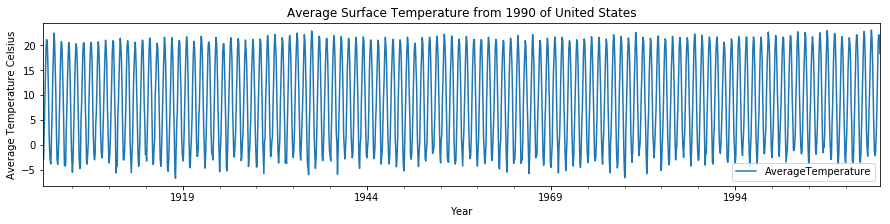

In [15]:
##  plot the data with x being dt column and y the average temperature
##  Specify the figure size because the default size will make things shrink too much
GTUS.plot(x='dt', y='AverageTemperature', figsize=(15,3))
##  add title to the figure and label for x and y
plt.title('Average Surface Temperature from 1990 of United States')
plt.xlabel('Year')
plt.ylabel('Average Temperature Celsius')
plt.show()

Nice figure! But we can't really tell if temperature is increasing with time. 

Maybe global warming is a myth after all!! 

let's dig deeper. 

First let's find the date for the highest temperature and the lowest. 

We will use max and min methods from pandas. 

In [16]:
GTUS.max()

dt                               2013-09-01 00:00:00
AverageTemperature                            23.008
AverageTemperatureUncertainty                   1.21
Country                                United States
dtype: object

In [17]:
GTUS.min()

dt                               1900-01-01 00:00:00
AverageTemperature                            -6.737
AverageTemperatureUncertainty                  0.053
Country                                United States
dtype: object

The highest average temperature was on 2013 and the lowest was on 1900.

Let's visualize the data differently. We can look at the average per year, that way we can notice a movement over time better. 

To do so, we need to create a dataframe with each row representing one year only. So we need to combine all the records for a specific year into one record by calculating the average of those records.

We will use a method from pandas dataframes `groupby`

This method will group the data based on a category that we specify and a method that we specify to join the data of that category together. 

In our case, the category to `groupby` will be by years and the method to join the records will be the mean of the data. 

Our dt column is of time datetime. datetime has a member called `dt` (in our case our column is also called dt but it could have been called anything else). Inside `datetime.dt` we have other members like month, day and year. Which is why at the beginning we made sure we are using datetime type. 

To group by the year, we simply specify that we want the year from the `dt` column.

Which can be accessed this way:

`GTUS.dt.dt.year`

the first dt is the column that holds the dates in our data and the second dt is datetime.dt which is the datetime type that has the other members (year). 

Then we will specify the function we want to be used on the grouped records which is `mean()`.

At the end we are calling `reset_index()` because otherwise the grouped column will be used as an index. If we reset the index, we get a different index starting at 0 and the grouped column (which is years) will stay as a separate column in our data.



In [0]:
GTUSByYear = GTUS.groupby(GTUS.dt.dt.year).mean().reset_index()

We can take a look at our new data and make sure we have the correct data grouped by the year.

In [19]:
GTUSByYear.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty
0,1900,9.021583,0.400583
1,1901,8.494917,0.403167
2,1902,8.454000,0.410500
3,1903,7.977250,0.419000
4,1904,8.200667,0.438667
5,1905,8.402333,0.367000
6,1906,8.560083,0.345333
7,1907,8.394000,0.322167
8,1908,8.755583,0.344750
9,1909,8.221833,0.281333


Now we have the average over the full year for the US temperature. Let's visualize the average temperature over the years.

We will plot two plots. One scatter plot, and another line plot. They are both the same data points, it will just give us a different ways of looking at the data. 

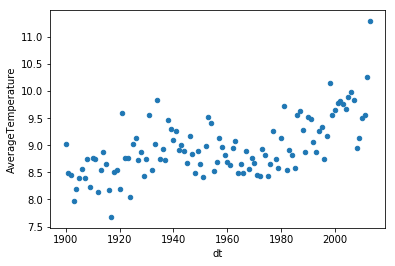

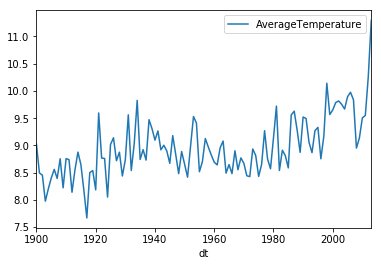

In [20]:
GTUSByYear.plot.scatter(x='dt', y='AverageTemperature')
GTUSByYear.plot(x='dt', y='AverageTemperature')
plt.show()

We do notice an upward movement in the temperature over the years. 
Does this mean we proved that global warming exist? 

Absolutely not. But we started collecting evidence maybe. 
If we apply the same method to every other country and to every city (the full dataset on Kaggle has a csv file for cities) and they all showed an consistant movement upwards, then our evidence will become stronger and stronger as we go. 

## Exercise 1: Repeat the same analysis for Canada and analyze the result

## Exercise 2: What country has the highest yearly average temperature in 2010

## Exercise 3: Between which two years Canada had the highest yearly average temperature jump (increase or decrease in average temperature the most) 

## Exercise 4: Define a question you want to investigate/answer from this data. Do the analysis and get the answer. You can discuss with us your ideas and approaches to how you are going to do the analysis.  